## Tercer Parcial de Computacional

#### Nombre: Marcel Parada Villamizar
#### Código: 1007407019

Se va a solucionar la ecuación de onda en una cuerda, esto esta dado por

\begin{equation}
{
\frac{\partial ^2U}{\partial t^2} =c^2\frac{\partial ^2U}{\partial x^2} 
}
\end{equation}

Teniendo en cuenta que
\begin{equation}
{
x\epsilon(0,L) ;
t\epsilon(0,T)
}
\end{equation}
 
Cumpliendo las siguientes condiciones para un valor inicial

(Forma de la cuerda inicial)
$$u(x,0) = I_{x}$$ 
(Cuerda iniciando desde el reposo)
$$\frac{\partial u(x,0)}{\partial t^2} = 0$$
x \epsilon  (0,T)
$$u(0,t) = 0$$ 
t \epsilon  (0,T)
$$u(L,t) = 0$$


Entonces la ecuación queda:
\begin{equation}
{
\frac{\partial ^2U(x_{i},t_{n})}{\partial t^2} =c^2\frac{\partial ^2U(x_{i},t_{n})}{\partial x^2} 
}
\end{equation}

Escribiendo las derivadas en diferencia finita, tenemos

$$\frac{\partial ^2U(x_{i},t_{n})}{\partial t^2} =\frac{U_{i}^{n+1}-2U_{i}^{n}+U_{i}^{n-1}}{\Delta t^2}$$


$$\frac{\partial ^2U(x_{i},t_{n})}{\partial x^2}  =\frac{U_{i}^{n+1}-2U_{i}^{n}+U_{i}^{n-1}}{\Delta X^2}$$

Por tanto, nos queda

\begin{equation}
{
\frac{U_{i}^{n+1}-2U_{i}^{n}+U_{i}^{n-1}}{\Delta t^2} =c^2\frac{U_{i}^{n+1}-2U_{i}^{n}+U_{i}^{n-1}}{\Delta X^2}
}
\end{equation}

A continuación realizamos el siguiente despeje

$$U_{i}^{n+1} =-U_{i}^{n-1}+2U_{i}^{n}+\frac{c^2 \Delta t^2}{\Delta X^2}(U_{i}^{n+1}-2U_{i}^{n}+U_{i}^{n-1})$$

Donde el número de courant es:

$$C=\frac{c^2 \Delta t^2}{\Delta X^2}$$

Que dandonos una formula recursiva

$$U_{i}^{n+1} =-U_{i}^{n-1}+2U_{i}^{n}+C(U_{i}^{n+1}-2U_{i}^{n}+U_{i}^{n-1})$$

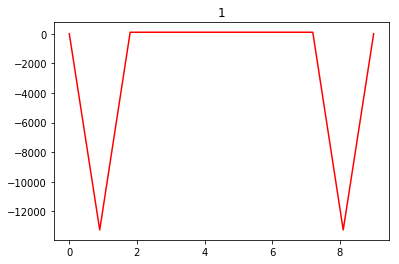

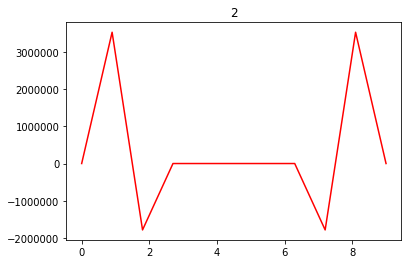

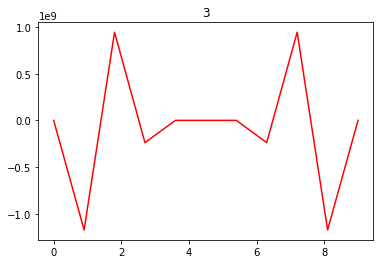

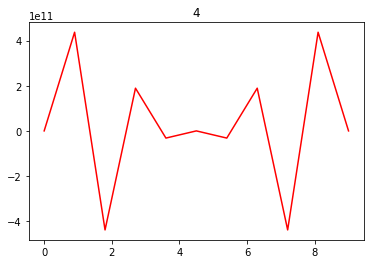

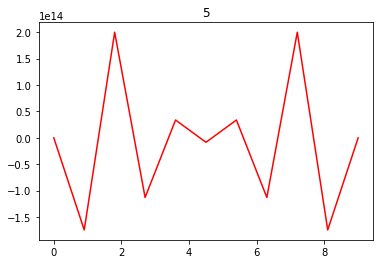

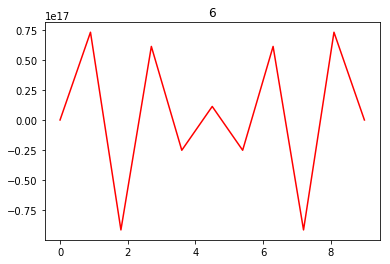

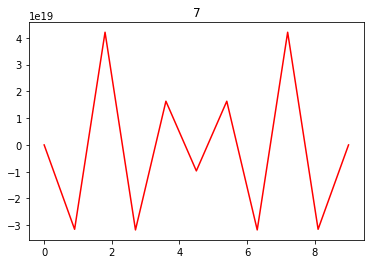

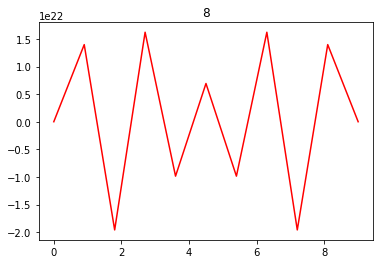

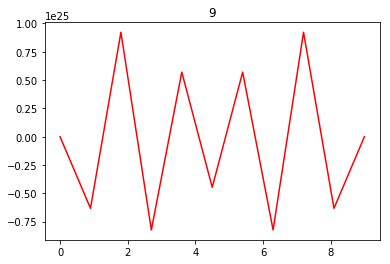

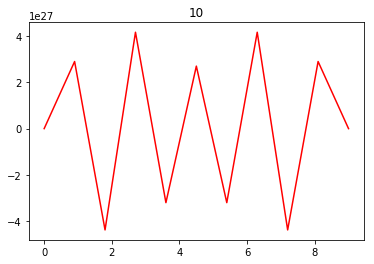

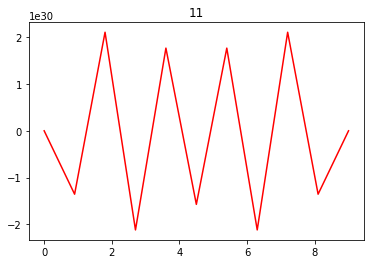

In [15]:
import numpy
from pylab import *
nx=10
nt=12
t=arange(0,20,nt+1)
dt=t[1]-t[0]
x=linspace(0,9,nx+1)
dx=x[1]-x[0]
c=0.8
C=c*dt/dx
C2=C**2
I=100 # este valor puede ser una funcion o un valor constante de como inicia la cuerda
u=zeros(nx+1)
U=zeros(nx+1)
U2=zeros(nx+1)

#La condición inicial de como inicia
for i in range(0,nx+1):
    U[i]=I
    
    
#Aqui incorparamos du/dt=0    
for  i in range(1,nx):
    u[i]=U[i]+0.5*C2*(U[i+1]-2*U[i]+U[i-1])

#Se crean las matrices
u[0]=0
u[nx]=0
U2[:]=U
U[:]=u

for n in range(1,nt):
    for i in range(1,nx):
        u[i]=2*U[i]-U2[i] + C2*(U[i+1]-2*U[i]+U[i-1])
#Aplicamos las condiciones iniciales        
    u[0]=0; u[nx]=0
    U2[:]=U
    U[:]=u
    plot(x,U,'r')
    title(n)
    show()


En la graficas anteriores nos muestra la propagación de una onda de una cuerda partiendo del reposo, la forma varia respecto a cada instante de tiempo, el cual al final se puede concluir que se forma una onda senoidal con amplitud 2. 